-----------------------------------------------
Objective value: 97840.83 EUR
Expected Profit: 152181.48 EUR
CVaR: 16329.8447422017 EUR
VaR: 21246.03 EUR
Eta values: [909.226061925031, 0.0, 11215.187289898502, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4935.506038529752, 813.2566076302523, 0.0, 939.2951050303245, 0.0, 0.0, 0.0, 0.0, 5410.594515581808, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12126.422333088365, 0.0, 0.0, 0.0, 8126.702757288078, 0.0, 1234.802802722988, 0.0, 0.0, 0.0, 0.0, 0.0, 12184.417733360653, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 834.026368324036, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5207.94971164963, 0.0, 0.0, 4148.376522225851, 0.0, 0.0, 975.5293091791841, 0.0, 0.0, 0.0, 7218.556041423883, 0.0, 0.0, 0.0, 0.0, 0.0, 1788.6095803079347, 0.0, 0.0, 0.0, 13874.20

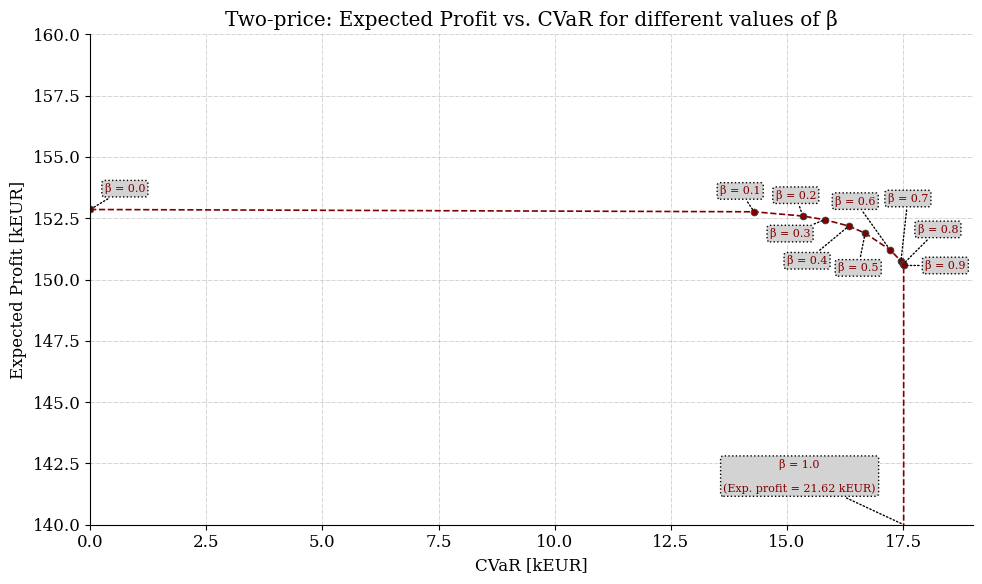

In [10]:
import gurobipy as gb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import random
from task_1c_v2 import cvr_op_scheme, cvr_tp_scheme

plt.rcParams['font.size']=12
plt.rcParams['font.family']='serif'
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False  
plt.rcParams['axes.spines.bottom'] = True     
plt.rcParams["axes.grid"] = True
plt.rcParams['grid.linestyle'] = '-.' 
plt.rcParams['grid.linewidth'] = 0.4


In [3]:
# Load data
with open('Data/ALL_scenarios.json') as f:
    all_scenarios = json.load(f)

# Constants
OMEGA = 250  # Number of scenarios to sample
PI = 1 / OMEGA  # Probability of each sampled scenario - assumed to be equal
S = len(all_scenarios.keys()) - 1  # Total number of scenarios
T = 24  # Number of hours
WIND_CAPACITY = 200  # MWh

random.seed(123)

# Sample scenarios without replacement
in_sample_scenarios = random.sample(range(S), 250)

scenarios = {}

# Extract sampled scenarios from dictionary containing all scenarios
for i in range(len(in_sample_scenarios)):
    scenarios[str(i)] = all_scenarios[str(in_sample_scenarios[i])]
    scenarios[str(i)]['Original Index'] = in_sample_scenarios[i]

# Indices of all scenarios
all_indices = list(range(S))

# Indices of out-of-sample scenarios
out_of_sample_indices = list(set(all_indices) - set(in_sample_scenarios))

# Sample 950 out-of-sample scenarios without replacement
out_sample_indices = random.sample(out_of_sample_indices, 950)
print(out_sample_indices)

# Extract out-of-sample scenarios from the dictionary containing all scenarios
out_sample_scenarios = {}
for i, idx in enumerate(out_sample_indices):
    out_sample_scenarios[str(i)] = all_scenarios[str(idx)]
    out_sample_scenarios[str(i)]['Original Index'] = idx

# Print information
print('Number of out-of-sample scenarios:', len(out_sample_scenarios))


[378, 1226, 756, 1214, 1210, 1306, 330, 803, 1178, 253, 1277, 1706, 863, 521, 1338, 794, 228, 630, 1190, 566, 474, 749, 612, 936, 109, 1179, 199, 460, 1188, 465, 1777, 45, 454, 620, 1327, 534, 210, 1408, 738, 206, 796, 1301, 1260, 321, 1899, 1253, 325, 1844, 1139, 1160, 1719, 1973, 1823, 72, 595, 1675, 1356, 1143, 795, 928, 520, 1180, 305, 1428, 1489, 15, 1865, 1857, 1410, 1427, 1164, 1991, 1634, 1374, 296, 1623, 133, 842, 1082, 845, 1569, 986, 735, 838, 504, 1807, 1053, 802, 1904, 1768, 451, 427, 897, 1893, 155, 973, 876, 1990, 614, 414, 1313, 879, 862, 171, 686, 1918, 1894, 1183, 1418, 1976, 138, 892, 130, 1377, 909, 694, 261, 1093, 1346, 1795, 1660, 755, 564, 1516, 1043, 615, 1030, 1322, 1341, 804, 576, 1622, 1070, 1931, 1350, 637, 786, 121, 430, 298, 51, 1005, 1549, 1168, 1725, 318, 1124, 1254, 108, 1108, 1269, 339, 758, 865, 513, 1403, 82, 1088, 1186, 1924, 1816, 668, 1659, 1361, 36, 746, 1716, 905, 528, 1615, 156, 586, 659, 400, 977, 836, 999, 1971, 1423, 34, 1169, 1580, 392, 462

In [ ]:
alpha = 0.9
beta_values = np.arange(0,1 + 0.1, 0.1)

In [15]:

results_per_beta_op, p_DA_values_per_beta_op = cvr_op_scheme(scenarios, WIND_CAPACITY, T, OMEGA, alpha, beta_values, minimize_printouts=False, mip_gap = 1e-4)
#results_per_beta_tp, p_DA_values_per_beta_tp = cvr_tp_scheme(scenarios, WIND_CAPACITY, T, OMEGA, alpha, beta_values, minimize_printouts=False, mip_gap = 1e-4)

beta_val = 0.5
optimal_DA_oneprice = p_DA_values_per_beta_op[beta_val]

Solving for beta = 0.50...
-----------------------------------------------
Objective value: 96281.30 EUR
Expected Profit: 169945.65 EUR
CVaR: 22616.9506431012 EUR
VaR: 28905.22 EUR
Eta values: [473.59265400771227, 6.138454332631245e-11, 13896.41398622312, 6.138454278094235e-11, 6.138454284023466e-11, 6.138454323532259e-11, 6.13845435787018e-11, 6.138454276674131e-11, 6.138454315596619e-11, 6.138454290520473e-11, 6.138454437067761e-11, 6.138454337542713e-11, 6.138454428840953e-11, 6.138454313242132e-11, 7596.7411996554465, 4174.5033672665195, 6.138454291474709e-11, 6.138713685190115e-11, 6.138454295434588e-11, 6.138454828029053e-11, 262.6038414190985, 6.138454351836394e-11, 9128.843836025613, 6.138454297791722e-11, 6.138454279137144e-11, 6.138454302230704e-11, 6.138454303759333e-11, 6.138454284016848e-11, 6.138454308112289e-11, 6.138454303964474e-11, 16263.654711592437, 6.138454292057044e-11, 6.138454280340196e-11, 6.13845430242261e-11, 9212.672037257082, 6.138454330149704e-11, 3187.182

In [4]:
# optimal_DA_bids = pd.read_csv('Data/optimal_DA_bids.csv', index_col=0)

# optimal_DA_oneprice = optimal_DA_bids['One-price Bids [MW]'].values
# optimal_DA_twoprice = optimal_DA_bids['Two-price Bids [MW]'].values


In [ ]:
def analyze_in_sample_op(num_in_sample_scenarios, all_scenarios, WIND_CAPACITY, T, alpha, beta_values):
    # Adjust Omega based on the number of in-sample scenarios
    OMEGA = num_in_sample_scenarios

    # Sample in-sample scenarios without replacement
    in_sample_scenarios = random.sample(range(len(all_scenarios.keys()) - 1), num_in_sample_scenarios)

    # Extract sampled in-sample scenarios from dictionary containing all scenarios
    scenarios = {}
    for i, idx in enumerate(in_sample_scenarios):
        scenarios[str(i)] = all_scenarios[str(idx)]
        scenarios[str(i)]['Original Index'] = idx

    # Run optimization for both one-price and two-price schemes
    p_DA_values_per_beta_op = cvr_op_scheme(scenarios, WIND_CAPACITY, T, OMEGA, alpha, beta_values, minimize_printouts=False, mip_gap = 1e-4) 
    beta_val = 0.5
    optimal_DA_oneprice = p_DA_per_beta_op[beta_val]

    # Calculate payments or earnings for out-of-sample scenarios
    total_payment_earnings = 0

    for scenario_idx in out_sample_scenarios:
        scenario = out_sample_scenarios[scenario_idx]

        x = scenario['Spot Price [EUR/MWh]'] * optimal_DA_oneprice

        realized_imbalance = np.array(scenario['Wind Power [MW]']) - optimal_DA_oneprice

        price_coefficient = 1.2 * np.array(scenario['System Balance State']) + 0.9 * (1 - np.array(scenario['System Balance State']))
        y = realized_imbalance * price_coefficient * scenario['Spot Price [EUR/MWh]']

        payment_earnings = x + y
        
        total_payment_earnings += np.sum(payment_earnings)

    # Calculate average payment or earnings over out-of-sample scenarios
    average_payment_earnings_one_price = total_payment_earnings / len(out_sample_scenarios)

    return average_payment_earnings_one_price

# Perform multiple iterations with different numbers of in-sample scenarios
tolerance = 0.05 
num_iterations = 10
in_sample_results = {}

for i in range(num_iterations):
    num_in_sample_scenarios = random.randint(200, 400)  
    avg_earnings_one_price = analyze_in_sample_op(num_in_sample_scenarios, all_scenarios, WIND_CAPACITY, T, alpha, beta_values)
    in_sample_results[num_in_sample_scenarios] = avg_earnings_one_price
    
    # Check if the absolute difference between in-sample and out-of-sample profits is below the tolerance
    if i > 0:
        prev_avg_earnings_one_price = list(in_sample_results.values())[-2]  
        if abs(avg_earnings_one_price - prev_avg_earnings_one_price) < tolerance:
            print(f"Convergence achieved after {i+1} iterations.")
            break

# Print the results
print("In-Sample Scenario Count\tAverage Out-of-Sample Earnings")
for num_in_sample_scenarios, avg_earnings_one_price in in_sample_results.items():
    print(f"{num_in_sample_scenarios}\t\t\t\t{avg_earnings_one_price}")


In [ ]:
def analyze_in_sample_tp(num_in_sample_scenarios, all_scenarios, WIND_CAPACITY, T, alpha, beta_values):
    # Adjust Omega based on the number of in-sample scenarios
    OMEGA = num_in_sample_scenarios

    # Sample in-sample scenarios without replacement
    in_sample_scenarios = random.sample(range(len(all_scenarios.keys()) - 1), num_in_sample_scenarios)

    # Extract sampled in-sample scenarios from dictionary containing all scenarios
    scenarios = {}
    for i, idx in enumerate(in_sample_scenarios):
        scenarios[str(i)] = all_scenarios[str(idx)]
        scenarios[str(i)]['Original Index'] = idx

    # Run optimization for both one-price and two-price schemes
    beta_values = [0.5]
    alpha = 0.9
    optimal_DA_twoprice = cvr_tp_scheme(scenarios, WIND_CAPACITY, T, OMEGA, alpha, beta_values, minimize_printouts=True, mip_gap=1e-4)

    # Calculate payments or earnings for out-of-sample scenarios
    total_payment_earnings = 0
    for scenario_idx in out_sample_scenarios:
        scenario = out_sample_scenarios[scenario_idx]

        x = scenario['Spot Price [EUR/MWh]'] * optimal_DA_twoprice

        realized_imbalance = np.array(scenario['Wind Power [MW]']) - optimal_DA_twoprice

        price_coefficients = np.zeros(T)

        for t in range(T):
            if (realized_imbalance[t] > 0) and (scenario['System Balance State'][t] == 0):
                price_coefficients[t] = 0.9
            elif (realized_imbalance[t] > 0) and (scenario['System Balance State'][t] == 1):
                price_coefficients[t] = 1.0
            elif (realized_imbalance[t] < 0) and (scenario['System Balance State'][t] == 0):
                price_coefficients[t] = -1.0
            elif (realized_imbalance[t] < 0) and (scenario['System Balance State'][t] == 1):
                price_coefficients[t] = -1.2

        y = np.abs(realized_imbalance) * price_coefficients * scenario['Spot Price [EUR/MWh]']

        payment_earnings = x + y

        total_payment_earnings += np.sum(payment_earnings)

    # Calculate average payment or earnings over out-of-sample scenarios
    average_payment_earnings_two_price = total_payment_earnings / len(out_sample_scenarios)

    return average_payment_earnings_two_price

# Perform multiple iterations with different numbers of in-sample scenarios
tolerance = 0.05 
num_iterations = 10
in_sample_results = {}

for i in range(num_iterations):
    num_in_sample_scenarios = random.randint(200, 400)  
    avg_earnings_two_price = analyze_in_sample_tp(num_in_sample_scenarios, all_scenarios, WIND_CAPACITY, T, alpha, beta_values)
    in_sample_results[num_in_sample_scenarios] = avg_earnings_two_price
    
    # Check if the absolute difference between in-sample and out-of-sample profits is below the tolerance
    if i > 0:
        prev_avg_earnings_two_price = list(in_sample_results.values())[-2]  
        if abs(avg_earnings_two_price - prev_avg_earnings_two_price) < tolerance:
            print(f"Convergence achieved after {i+1} iterations.")
            break

# Print the results
print("In-Sample Scenario Count\tAverage Out-of-Sample Earnings")
for num_in_sample_scenarios, avg_earnings_two_price in in_sample_results.items():
    print(f"{num_in_sample_scenarios}\t\t\t\t{avg_earnings_two_price}")
